In [1]:
%matplotlib inline

In [2]:
import keras
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from functools import reduce
from datetime import date

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
co2 = sm.datasets.co2.data.load_pandas().data

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_median is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=52,center=False).median()
  """Entry point for launching an IPython kernel.


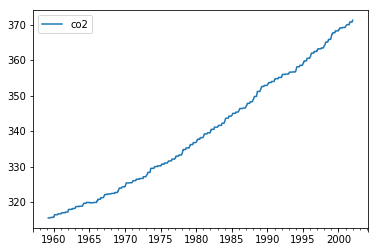

In [4]:
pd.rolling_median(co2.interpolate(), window=52).plot()

In [5]:
observacoes = reduce(lambda x,y: x + y[1:], sm.datasets.elnino.load().data.tolist())[1:]

indice = pd.DatetimeIndex(freq='M', start=date(year=1950, month=1, day=31), periods=12*61)

data_series = pd.Series(observacoes, indice)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=360,center=False).median()
  """Entry point for launching an IPython kernel.


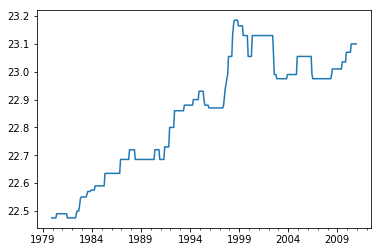

In [6]:
pd.rolling_median(data_series, window=360).plot()

In [7]:
cycle, trend = sm.tsa.filters.hpfilter(observacoes, lamb=129600)

In [8]:
teste = pd.Series(trend, indice)

/usr/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


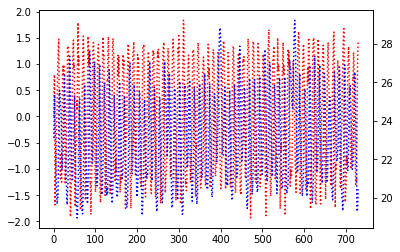

In [66]:
fig, ax1 = plt.subplots()

ax1.plot(range(731), sm.tsa.ARIMA(observacoes, (9,1,1)).fit().predict(), 'r:')

ax2 = ax1.twinx()
ax2.plot(range(731), observacoes[:-1], 'b:')

In [35]:
nilo = pd.Series(map(lambda x: x[1], sm.datasets.nile.load().data), index=pd.DatetimeIndex(start=date(year=1871, month=1, day=1), freq='YS', end=date(year=1970, month=1, day=1)))

In [73]:
niloTrend = pd.rolling_median(nilo, window=20)[19:]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_median is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).median()
  """Entry point for launching an IPython kernel.


In [81]:
sm.tsa.ARIMA(nilo, order=(1,1,1)).fit().score()

/usr/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


AttributeError: 'ARIMAResults' object has no attribute 'score'